In [1]:
#importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data

dataf = pd.read_csv('C:/Users/Neha Verma/Documents/final project/mental health dataset/mental-heath-in-tech-2016_20161114.csv')


In [3]:
# Renaming the features
renamed_features = ['self_employed', 'company_employee_total',  'tech_company', 'tech_IT_role', 'mentalhealth_coverage',
                    'mentalhealth_coverage_awareness', 'mentalhealth_employer_discussion', 'mentalhealth_resources_provided', 'mentalhealth_anonimity_protection',
                    'mentalhealth_medical_leave_issue', 'mentalhealth_discussion_negative_impact', 'physicalhealth_discussion_negative_impact', 'mentalhealth_discussion_coworkers', 
                    'mentalhealth_discussion_directsupervisor', 'mentalhealth_seriousness_employer', 'mentalhealth_negative_consequences_coworkers', 'mentalhealth_coverage',
                    'mentalhealth_local_online_resources','mentalhealth_diagnosed_revealed_client','mentalhealth_diagnosed_revealed_client_impact','mentalhealth_diagnosed_reveal_coworker',
                    'mentalhealth_coworker_reveal_negative_impact','mentalhealth_productivity_impact','mentalhealth_productivity_impact_percentage','previous_employer','previous_mentalhealth_benefits'
                    ,'previous_mentalhealth_benefits_awareness','previous_mentalhealth_discussion','previous_mentalhealth_resources','previous_mentalhealth_anonimity','previous_mentalhealth_discussion_negative_consequences'
                    ,'previous_physicalhealth_discussion_negative_consequences','previous_mentalhealth_discussion_coworker','previous_mentalhealth_discussion_directsupervisor','previous_mentalhealth_importance'
                    ,'previous_mentalhealth_consequences_coworkers','physicalhealth_issue_futureinterview','why/why not','mental_issue_futureinterview','why/why not','mentalhealth_issue_future_career','mentalhealth_response_teammember'
                    ,'mentalhealth_share_friends/family','mentalhealth_bad_response','mentalhealth_reveal_others_discussion','mentalhealth_family_history','mentalhealth_disorder_past','mentalhealth_disorder_current','yes_diagnosis'
                    ,'maybe_diagnosis','mentalhealth_diagnosed_professional','yes_diagnosis_professional','mentalhealth_treatment_professional','mentalhealth_issue_interfere_work','mentalhealth_issue_interfere_work_not_treated'
                    ,'age','gender','country','US_STATE','country_work','US_STATE_work','work_position','work_remote']
dataf.columns = renamed_features
dataf.head()

,self_employed,company_employee_total,tech_company,tech_IT_role,mentalhealth_coverage,mentalhealth_coverage_awareness,mentalhealth_employer_discussion,mentalhealth_resources_provided,mentalhealth_anonimity_protection,mentalhealth_medical_leave_issue,...,mentalhealth_issue_interfere_work,mentalhealth_issue_interfere_work_not_treated,age,gender,country,US_STATE,country_work,US_STATE_work,work_position,work_remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [4]:
# pre process the gender feature

dataf['gender'] = dataf['gender'].replace('nan', np.nan)
dataf['gender'] = dataf['gender'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE','Male'],value=0)

dataf['gender'] = dataf['gender'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Female','Cis female '],value=1)

dataf['gender'] = dataf['gender'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'],value=2)

In [5]:
# pre process the compnay size

import numpy as np

def preprocess_company_size(size):
    if pd.isnull(size):  # Handle missing values
        return np.nan
    elif 'More than' in size:  # Handle 'More than' values
        return 10000  # Replace 'More than' with a large number
    else:
        # Extract lower and upper bounds of the range
        lower, upper = map(int, size.split('-'))
        # Compute the average of the range and return
        return (lower + upper) / 2

# Apply the preprocessing function to the column 'company_employee_total'
dataf['company_employee_total'] = dataf['company_employee_total'].apply(preprocess_company_size).astype(float)

dataf['company_employee_total'].unique()

array([6.30e+01, 1.55e+01,      nan, 1.00e+04, 3.00e+02, 7.50e+02,
       3.00e+00])

## CNN XGBOOST ENSEMBLE

In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
import time

# Define the category mapping
category_mapping = {
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)': 'Combined Disorder Category',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'Mood Disorder',
    'Substance Use Disorder': 'Substance Use Disorder',
    'Stress Response Syndromes': 'Stress Response Syndromes',
    'Attention Deficit Hyperactivity Disorder': 'ADHD',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'Anxiety',
     'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder': 'Combined Disorder Category',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder':'Combined Disorder Category',
    
    # Add other mappings as needed
}

# Preprocess the target variable
y = dataf['yes_diagnosis_professional']
y_mapped = [category_mapping[label] if label in category_mapping else 'Other' for label in y]
y_split = [label.split('|') if pd.notna(label) else [] for label in y_mapped]

mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y_split)

# Create a new DataFrame for pre-processing
data_selected_filled = dataf[['age', 'gender', 'company_employee_total', 'tech_company', 'tech_IT_role',
                              'mentalhealth_coverage', 'mentalhealth_coverage_awareness',
                              'mentalhealth_resources_provided', 'previous_mentalhealth_benefits',
                              'previous_mentalhealth_benefits_awareness', 'mentalhealth_seriousness_employer',
                              'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                               'country','work_position']].copy()

# Define the columns that need imputation
numeric_columns = ['age', 'company_employee_total']
categorical_columns = ['gender', 'tech_IT_role', 'mentalhealth_coverage',
                       'mentalhealth_coverage_awareness', 'mentalhealth_resources_provided',
                       'previous_mentalhealth_benefits', 'previous_mentalhealth_benefits_awareness',
                       'mentalhealth_seriousness_employer', 'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                        'country','work_position']

# Apply imputation to numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
data_selected_filled[numeric_columns] = numeric_imputer.fit_transform(data_selected_filled[numeric_columns])

# Apply imputation to categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_selected_filled[categorical_columns] = categorical_imputer.fit_transform(data_selected_filled[categorical_columns])

# Apply one-hot encoding to categorical columns
onehot_encoder = OneHotEncoder()
encoded_categorical = onehot_encoder.fit_transform(data_selected_filled[categorical_columns]).toarray()

# Combine numeric and encoded categorical features
X = np.concatenate((data_selected_filled[numeric_columns], encoded_categorical), axis=1)

# Convert y to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_mapped)


# Define the resampling strategy
resampler = RandomOverSampler(sampling_strategy='not majority', random_state=42)

# Initialize StratifiedKFold for cross-validation
n_splits = 5  # You can change the number of splits as needed
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store scores
cnn_scores = []
xgb_scores = []
combined_scores = []

# Perform k-fold cross-validation with data augmentation and resampling
for train_index, test_index in stratified_kfold.split(X, y_encoded):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Apply resampling to the training data
    X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Reshape X_train and X_test for the CNN model
    X_train_cnn = X_train_scaled[:, :, np.newaxis]
    X_test_cnn = X_test_scaled[:, :, np.newaxis]

    # Build and compile the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(len(mlb.classes_), activation='softmax'))
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Initialize a list to store epoch durations
    epoch_durations = []

    # Train the CNN model
    for epoch in range(10):  # Adjust the number of epochs as needed
        start_time = time.time()

        # Train the model for one epoch
        cnn_model.fit(X_train_cnn, to_categorical(y_train_resampled, num_classes=len(mlb.classes_)), epochs=1, batch_size=32, validation_split=0.1)

        end_time = time.time()
        epoch_duration = end_time - start_time
        epoch_durations.append(epoch_duration)

    # Calculate the average epoch duration
    average_epoch_duration = np.mean(epoch_durations)
    print("Average Epoch Duration:", average_epoch_duration)

    # Predict using the CNN model
    y_pred_cnn_onehot = cnn_model.predict(X_test_cnn)
    y_pred_cnn = np.argmax(y_pred_cnn_onehot, axis=1)
    
    # Build and train the XGBoost model
    xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
    multi_xgb_model = MultiOutputClassifier(xgb_model)
    multi_xgb_model.fit(X_train_scaled, to_categorical(y_train_resampled, num_classes=len(mlb.classes_)))

    # Predict using the XGBoost model
    y_pred_xgb = multi_xgb_model.predict(X_test_scaled)
    
    # Combine CNN predictions and XGBoost predictions
    combined_predictions = np.concatenate((y_pred_cnn.reshape(-1, 1), y_pred_xgb), axis=1)

    # a new model ( a Gradient Boosting Classifier) to combine the predictions
    combined_model = GradientBoostingClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
    combined_model.fit(combined_predictions, y_test)
    
    # Evaluate the models
    cnn_scores.append(cnn_model.evaluate(X_test_cnn, to_categorical(y_test, num_classes=len(mlb.classes_)))[1])
    xgb_scores.append(multi_xgb_model.score(X_test_scaled, to_categorical(y_test, num_classes=len(mlb.classes_))))
    combined_scores.append(combined_model.score(combined_predictions, y_test))

#print("Combined Model Accuracy:", np.mean(combined_scores))


# Train the final combined model on the entire dataset
final_combined_model = GradientBoostingClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
final_combined_model.fit(X, y_encoded)  # Train on the entire feature matrix X

# Predict using the final combined model
final_combined_predictions = final_combined_model.predict(X)  # Predict using the entire feature matrix X

# Calculate and print accuracy on the entire dataset
final_combined_accuracy = accuracy_score(y_encoded, final_combined_predictions)
print("Accuracy on CNN XGBoost Ensemble:", final_combined_accuracy)




148/148 [==============================] - 2s 16ms/step - loss: 0.4832 - accuracy: 0.8233 - val_loss: 0.0026 - val_accuracy: 1.0000
Average Epoch Duration: 2.356151056289673
148/148 [==============================] - 2s 16ms/step - loss: 0.4734 - accuracy: 0.8338 - val_loss: 0.0019 - val_accuracy: 1.0000
Average Epoch Duration: 2.4738104581832885
148/148 [==============================] - 2s 16ms/step - loss: 0.5211 - accuracy: 0.8205 - val_loss: 0.0060 - val_accuracy: 1.0000
Average Epoch Duration: 2.501302790641785
148/148 [==============================] - 2s 16ms/step - loss: 0.4947 - accuracy: 0.8260 - val_loss: 0.0043 - val_accuracy: 1.0000
Average Epoch Duration: 2.3811349391937258
148/148 [==============================] - 2s 16ms/step - loss: 0.4996 - accuracy: 0.8339 - val_loss: 0.0040 - val_accuracy: 1.0000
Average Epoch Duration: 2.636059594154358
9/9 [==============================] - 0s 8ms/step - loss: 2.1031 - accuracy: 0.4930
Accuracy on CNN XGBoost Ensemble: 0.8646196

Precision on  CNN XGBOOST ENSEMBLE: 0.864809030225493
Recall on CNN XGBOOST ENSEMBLE: 0.8646196789951152
F1-Score on CNN XGBOOST ENSEMBLE: 0.8559058116826682


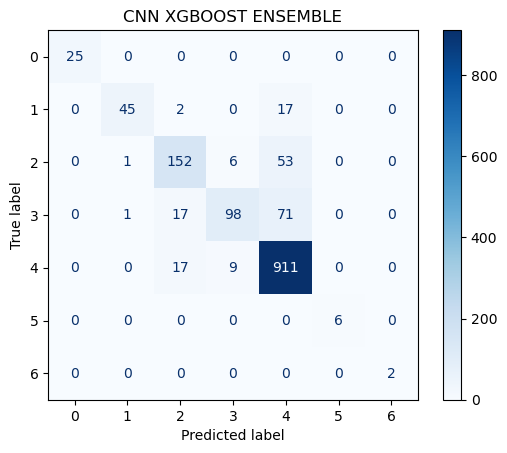

In [7]:
# Confusion matrix

from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate precision, recall, and F1-score on the entire dataset
final_combined_precision = precision_score(y_encoded, final_combined_predictions, average='weighted')
final_combined_recall = recall_score(y_encoded, final_combined_predictions, average='weighted')
final_combined_f1 = f1_score(y_encoded, final_combined_predictions, average='weighted')

print("Precision on  CNN XGBOOST ENSEMBLE:", final_combined_precision)
print("Recall on CNN XGBOOST ENSEMBLE:", final_combined_recall)
print("F1-Score on CNN XGBOOST ENSEMBLE:", final_combined_f1)

# Plot the confusion matrix for the final combined model on the entire dataset
unique_labels = np.unique(y_encoded)
plot_confusion_matrix(final_combined_model, X, y_encoded, display_labels=unique_labels, cmap=plt.cm.Blues)
plt.title("CNN XGBOOST ENSEMBLE")
plt.show()


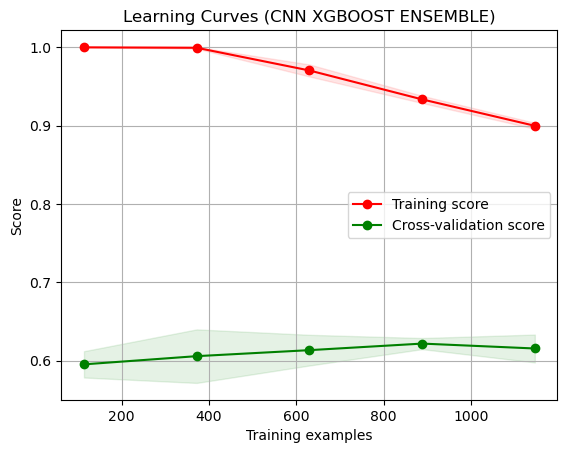

In [8]:
# Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Define the title for the learning curve plot
title = "Learning Curves (CNN XGBOOST ENSEMBLE)"

# Specify the classifier (final_combined_model) and dataset (X and y_encoded)
plot_learning_curve(final_combined_model, title, X, y_encoded, cv=stratified_kfold)
plt.show()


## CNN XGBOOST

In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from keras.utils import to_categorical
import time


# Define the category mapping
category_mapping = {
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)': 'Combined Disorder Category',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'Mood Disorder',
    'Substance Use Disorder': 'Substance Use Disorder',
    'Stress Response Syndromes': 'Stress Response Syndromes',
    'Attention Deficit Hyperactivity Disorder': 'ADHD',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'Anxiety',
     'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder': 'Combined Disorder Category',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder':'Combined Disorder Category',
    
    # Add other mappings as needed
}

# Preprocess the target variable
y = dataf['yes_diagnosis_professional']
y_mapped = [category_mapping[label] if label in category_mapping else 'Other' for label in y]
y_split = [label.split('|') if pd.notna(label) else [] for label in y_mapped]

mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y_split)

# Create a new DataFrame for pre-processing
data_selected_filled = dataf[['age', 'gender', 'company_employee_total', 'tech_company', 'tech_IT_role',
                              'mentalhealth_coverage', 'mentalhealth_coverage_awareness',
                              'mentalhealth_resources_provided', 'previous_mentalhealth_benefits',
                              'previous_mentalhealth_benefits_awareness', 'mentalhealth_seriousness_employer',
                              'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                               'country','work_position']].copy()

# Define the columns that need imputation
numeric_columns = ['age', 'company_employee_total']
categorical_columns = ['gender', 'tech_IT_role', 'mentalhealth_coverage',
                       'mentalhealth_coverage_awareness', 'mentalhealth_resources_provided',
                       'previous_mentalhealth_benefits', 'previous_mentalhealth_benefits_awareness',
                       'mentalhealth_seriousness_employer', 'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                        'country','work_position']

# Apply imputation to numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
data_selected_filled[numeric_columns] = numeric_imputer.fit_transform(data_selected_filled[numeric_columns])

# Apply imputation to categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_selected_filled[categorical_columns] = categorical_imputer.fit_transform(data_selected_filled[categorical_columns])

# Apply one-hot encoding to categorical columns
onehot_encoder = OneHotEncoder()
encoded_categorical = onehot_encoder.fit_transform(data_selected_filled[categorical_columns]).toarray()

# Combine numeric and encoded categorical features
X = np.concatenate((data_selected_filled[numeric_columns], encoded_categorical), axis=1)

# Convert y to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_mapped)


# Initialize StratifiedKFold for cross-validation
n_splits = 5  # You can change the number of splits as needed
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store accuracy scores
xgb_accuracies = []

# Perform cross-validation
for train_index, val_index in stratified_kfold.split(X, y_encoded):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Reshape X_train and X_val for the CNN model
    X_train_cnn = X_train_scaled[:, :, np.newaxis]
    X_val_cnn = X_val_scaled[:, :, np.newaxis]

    # Build and train the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(len(mlb.classes_), activation='softmax'))
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Lists to store epoch durations
    epoch_durations = []

    # Train the CNN model
    for epoch in range(20):  # Adjust the number of epochs as needed
        start_time = time.time()

        # Train the model for one epoch
        cnn_model.fit(X_train_cnn, to_categorical(y_train, num_classes=len(mlb.classes_)), epochs=1, batch_size=32, validation_split=0.1)

        end_time = time.time()
        epoch_duration = end_time - start_time
        epoch_durations.append(epoch_duration)

        print("Epoch", epoch + 1, "Duration:", epoch_duration)

    # Calculate the average epoch duration
    average_epoch_duration = np.mean(epoch_durations)
    print("Average Epoch Duration:", average_epoch_duration)

   
     # Extract features using the trained CNN model
    X_train_cnn_features = cnn_model.predict(X_train_cnn)
    X_val_cnn_features = cnn_model.predict(X_val_cnn)

    # Train the XGBoost model on CNN features
    xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train_cnn_features, y_train)



    # Predict using the XGBoost model
    y_pred_xgb = xgb_model.predict(X_val_cnn_features)

    # Evaluate the XGBoost model
    accuracy = accuracy_score(y_pred_xgb, y_val)
    xgb_accuracies.append(accuracy)
    
# Calculate and print mean accuracy across cross-validation folds
mean_accuracy = np.mean(xgb_accuracies)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

# Train the combined model on the entire dataset
combined_model = xgb.XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
combined_model.fit(X, y_encoded)  # Fit on the entire dataset

# Predict using the combined model
combined_predictions = combined_model.predict(X)

# Generate classification report for the combined model
combined_classification_report = classification_report(
    y_encoded, combined_predictions, target_names=mlb.classes_, output_dict=True
)

# Print the classification report
#print("Classification Report for Combined Model:")
#print(combined_classification_report)

# Calculate and print accuracy on the entire dataset
accuracy_on_entire_dataset = accuracy_score(y_encoded, combined_predictions)
print("Accuracy on CNN XGBOOST HYBRID:", accuracy_on_entire_dataset)





33/33 [==============================] - 1s 20ms/step - loss: 1.1524 - accuracy: 0.6450 - val_loss: 1.3839 - val_accuracy: 0.5130
Epoch 1 Duration: 1.2075774669647217
33/33 [==============================] - 0s 15ms/step - loss: 0.8277 - accuracy: 0.6906 - val_loss: 1.3545 - val_accuracy: 0.5130
Epoch 2 Duration: 0.5520777702331543
33/33 [==============================] - 1s 18ms/step - loss: 0.7326 - accuracy: 0.7081 - val_loss: 1.4348 - val_accuracy: 0.5130
Epoch 3 Duration: 0.6732571125030518
33/33 [==============================] - 1s 19ms/step - loss: 0.6737 - accuracy: 0.7304 - val_loss: 1.4899 - val_accuracy: 0.4870
Epoch 4 Duration: 0.7074599266052246
33/33 [==============================] - 1s 20ms/step - loss: 0.6384 - accuracy: 0.7468 - val_loss: 1.6102 - val_accuracy: 0.4957
Epoch 5 Duration: 0.7680327892303467
33/33 [==============================] - 1s 18ms/step - loss: 0.6221 - accuracy: 0.7362 - val_loss: 1.7429 - val_accuracy: 0.4870
Epoch 6 Duration: 0.686282157897949

33/33 [==============================] - 1s 18ms/step - loss: 0.5823 - accuracy: 0.7653 - val_loss: 1.7116 - val_accuracy: 0.5043
Epoch 8 Duration: 0.6821458339691162
33/33 [==============================] - 1s 18ms/step - loss: 0.5756 - accuracy: 0.7604 - val_loss: 1.7069 - val_accuracy: 0.4696
Epoch 9 Duration: 0.6866071224212646
33/33 [==============================] - 1s 19ms/step - loss: 0.5690 - accuracy: 0.7468 - val_loss: 1.7039 - val_accuracy: 0.4957
Epoch 10 Duration: 0.6966338157653809
33/33 [==============================] - 1s 18ms/step - loss: 0.5752 - accuracy: 0.7565 - val_loss: 1.7903 - val_accuracy: 0.4696
Epoch 11 Duration: 0.6906287670135498
33/33 [==============================] - 1s 19ms/step - loss: 0.5646 - accuracy: 0.7556 - val_loss: 1.8195 - val_accuracy: 0.4696
Epoch 12 Duration: 0.7045431137084961
33/33 [==============================] - 1s 19ms/step - loss: 0.5516 - accuracy: 0.7614 - val_loss: 1.8522 - val_accuracy: 0.4696
Epoch 13 Duration: 0.71874809265

33/33 [==============================] - 1s 18ms/step - loss: 0.5300 - accuracy: 0.7829 - val_loss: 2.1453 - val_accuracy: 0.5043
Epoch 15 Duration: 0.6850697994232178
33/33 [==============================] - 1s 18ms/step - loss: 0.5355 - accuracy: 0.7800 - val_loss: 2.0997 - val_accuracy: 0.5130
Epoch 16 Duration: 0.6849374771118164
33/33 [==============================] - 1s 19ms/step - loss: 0.5255 - accuracy: 0.7810 - val_loss: 2.1828 - val_accuracy: 0.5217
Epoch 17 Duration: 0.7109355926513672
33/33 [==============================] - 1s 19ms/step - loss: 0.5227 - accuracy: 0.7829 - val_loss: 2.1751 - val_accuracy: 0.5217
Epoch 18 Duration: 0.9897429943084717
33/33 [==============================] - 1s 19ms/step - loss: 0.5275 - accuracy: 0.7791 - val_loss: 2.1618 - val_accuracy: 0.5391
Epoch 19 Duration: 0.7183849811553955
33/33 [==============================] - 1s 19ms/step - loss: 0.5152 - accuracy: 0.7926 - val_loss: 2.2436 - val_accuracy: 0.5043
Epoch 20 Duration: 0.719063758

Weighted Average Metrics:
Precision on CNN XGBOOST HYBRID: 0.8089
Recall on CNN XGBOOST HYBRID: 0.8060
F1-Score on CNN XGBOOST HYBRID: 0.7904
Accuracy: 0.8060


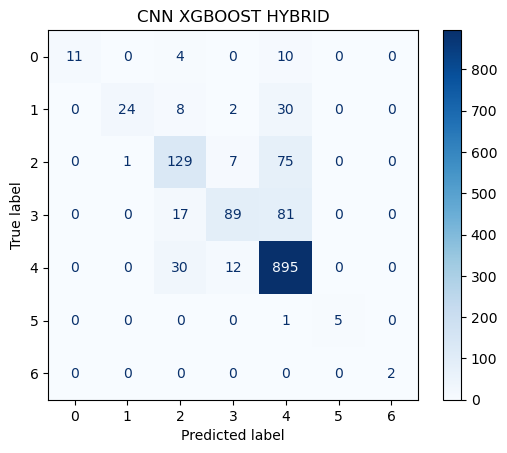

In [10]:
# Confusion matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for the combined model
precision_scores = precision_score(y_encoded, combined_predictions, average=None)
recall_scores = recall_score(y_encoded, combined_predictions, average=None)
f1_scores = f1_score(y_encoded, combined_predictions, average=None)

# Calculate accuracy
accuracy = accuracy_score(y_encoded, combined_predictions)

# Print the weighted average precision, recall, and F1-score
print("Weighted Average Metrics:")
print(f"Precision on CNN XGBOOST HYBRID: {precision_score(y_encoded, combined_predictions, average='weighted'):.4f}")
print(f"Recall on CNN XGBOOST HYBRID: {recall_score(y_encoded, combined_predictions, average='weighted'):.4f}")
print(f"F1-Score on CNN XGBOOST HYBRID: {f1_score(y_encoded, combined_predictions, average='weighted'):.4f}")

# Print accuracy
print(f"Accuracy: {accuracy:.4f}")

# Plot the confusion matrix for the combined model
plot_confusion_matrix(combined_model, X, y_encoded, cmap=plt.cm.Blues)
plt.title("CNN XGBOOST HYBRID")
plt.show()


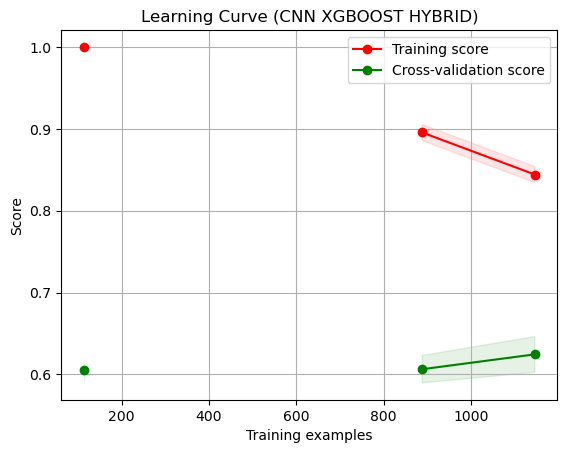

In [11]:
# Learning Curve
from sklearn.model_selection import learning_curve

# Define the title for the learning curve plot
learning_curve_title = "Learning Curve (CNN XGBOOST HYBRID)"

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Specify the classifier (combined_model) and dataset (X and y_encoded)
plot_learning_curve(combined_model, learning_curve_title, X, y_encoded, cv=stratified_kfold)
plt.show()


## CNN

In [14]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical
import time

# Define the category mapping
category_mapping = {
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)': 'Combined Disorder Category',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'Mood Disorder',
    'Substance Use Disorder': 'Substance Use Disorder',
    'Stress Response Syndromes': 'Stress Response Syndromes',
    'Attention Deficit Hyperactivity Disorder': 'ADHD',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'Anxiety',
     'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder': 'Combined Disorder Category',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder':'Combined Disorder Category',
    
    # Add other mappings as needed
}

# Preprocess the target variable
y = dataf['yes_diagnosis_professional']
y_mapped = [category_mapping[label] if label in category_mapping else 'Other' for label in y]
y_split = [label.split('|') if pd.notna(label) else [] for label in y_mapped]

mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y_split)

# Create a new DataFrame for pre-processing
data_selected_filled = dataf[['age', 'gender', 'company_employee_total', 'tech_company', 'tech_IT_role',
                              'mentalhealth_coverage', 'mentalhealth_coverage_awareness',
                              'mentalhealth_resources_provided', 'previous_mentalhealth_benefits',
                              'previous_mentalhealth_benefits_awareness', 'mentalhealth_seriousness_employer',
                              'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                               'country','work_position']].copy()

# Define the columns that need imputation
numeric_columns = ['age', 'company_employee_total']
categorical_columns = ['gender', 'tech_IT_role', 'mentalhealth_coverage',
                       'mentalhealth_coverage_awareness', 'mentalhealth_resources_provided',
                       'previous_mentalhealth_benefits', 'previous_mentalhealth_benefits_awareness',
                       'mentalhealth_seriousness_employer', 'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                        'country','work_position']

# Apply imputation to numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
data_selected_filled[numeric_columns] = numeric_imputer.fit_transform(data_selected_filled[numeric_columns])

# Apply imputation to categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_selected_filled[categorical_columns] = categorical_imputer.fit_transform(data_selected_filled[categorical_columns])

# Apply one-hot encoding to categorical columns
onehot_encoder = OneHotEncoder()
encoded_categorical = onehot_encoder.fit_transform(data_selected_filled[categorical_columns]).toarray()

# Combine numeric and encoded categorical features
X = np.concatenate((data_selected_filled[numeric_columns], encoded_categorical), axis=1)

# Convert y to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_mapped)

# Initialize the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(len(mlb.classes_), activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Lists to store accuracy scores and epoch durations
train_accuracies = []
epoch_durations = []
val_accuracies = []

# Train the CNN model for a specified number of epochs
num_epochs = 20  # Adjust the number of epochs as needed

for epoch in range(num_epochs):
    start_time = time.time()

    # Train the CNN model for one epoch
    cnn_model.fit(X, to_categorical(y_encoded, num_classes=len(mlb.classes_)), epochs=1, batch_size=32)
    # Evaluate the CNN model on training and validation data
    train_accuracy = cnn_model.evaluate(X_train, to_categorical(y_train, num_classes=len(mlb.classes_)), verbose=0)[1]
    val_accuracy = cnn_model.evaluate(X_val, to_categorical(y_val, num_classes=len(mlb.classes_)), verbose=0)[1]

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)


    end_time = time.time()
    epoch_duration = end_time - start_time
    epoch_durations.append(epoch_duration)

    print("Epoch", epoch + 1, "Duration:", epoch_duration)

# Calculate and print average epoch duration
average_epoch_duration = np.mean(epoch_durations)
print("Average Epoch Duration:", average_epoch_duration)

# Predict using the trained CNN model on the entire dataset
y_pred_cnn = np.argmax(cnn_model.predict(X), axis=1)

# Calculate accuracy on the entire dataset
accuracy_on_entire_dataset = accuracy_score(y_encoded, y_pred_cnn)
print("Accuracy on CNN:", accuracy_on_entire_dataset)


45/45 [==============================] - 1s 13ms/step - loss: 4.9951 - accuracy: 0.5304
Epoch 1 Duration: 1.709733247756958
45/45 [==============================] - 1s 12ms/step - loss: 2.9574 - accuracy: 0.6134
Epoch 2 Duration: 1.0103082656860352
45/45 [==============================] - 1s 16ms/step - loss: 2.7155 - accuracy: 0.6071
Epoch 3 Duration: 1.2711527347564697
45/45 [==============================] - 1s 15ms/step - loss: 2.3329 - accuracy: 0.6029
Epoch 4 Duration: 1.2538197040557861
45/45 [==============================] - 1s 16ms/step - loss: 2.7373 - accuracy: 0.6099
Epoch 5 Duration: 1.2435340881347656
45/45 [==============================] - 1s 14ms/step - loss: 2.6047 - accuracy: 0.6183
Epoch 6 Duration: 1.1335036754608154
45/45 [==============================] - 1s 14ms/step - loss: 3.5494 - accuracy: 0.5967
Epoch 7 Duration: 1.1601438522338867
45/45 [==============================] - 1s 16ms/step - loss: 2.1548 - accuracy: 0.6441
Epoch 8 Duration: 1.2459754943847656
4

Precision on CNN: 0.7029747711110997
Recall on CNN: 0.7034193998604327
F1-score on CNN: 0.6672206856838888


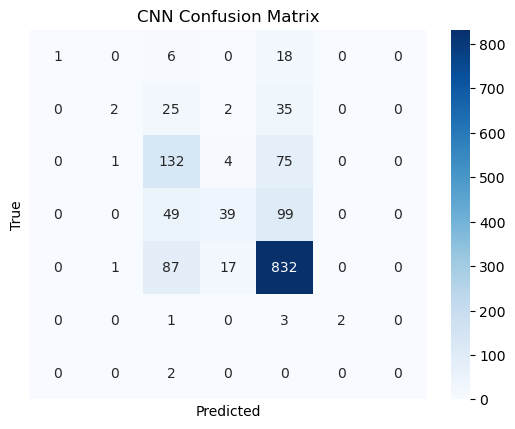

In [15]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score on the entire dataset
precision, recall, f1, _ = precision_recall_fscore_support(y_encoded, y_pred_cnn, average='weighted')

print("Precision on CNN:", precision)
print("Recall on CNN:", recall)
print("F1-score on CNN:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_encoded, y_pred_cnn)

# Plot confusion matrix without labels
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=False, yticklabels=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("CNN Confusion Matrix")
plt.show()


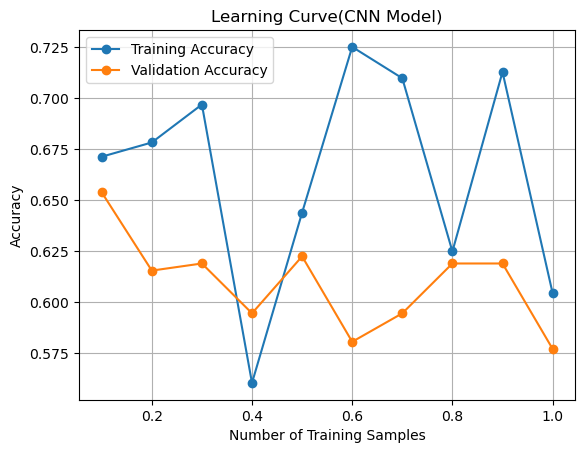

In [16]:
# Learning Curve

# Define train sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Loop through different training sizes
for train_size in train_sizes:
    subset_size = int(len(X) * train_size)
    X_subset = X[:subset_size]
    y_subset = y_encoded[:subset_size]

    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_subset.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(len(mlb.classes_), activation='softmax'))
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    cnn_model.fit(X_subset, to_categorical(y_subset, num_classes=len(mlb.classes_)), epochs=20, batch_size=32, validation_split=0.1, verbose=0)
    
    # Evaluate the CNN model
    train_loss, train_accuracy = cnn_model.evaluate(X_subset, to_categorical(y_subset, num_classes=len(mlb.classes_)), verbose=0)
    val_loss, val_accuracy = cnn_model.evaluate(X_val_cnn, to_categorical(y_val, num_classes=len(mlb.classes_)), verbose=0)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot the learning curve
#plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(train_sizes, val_accuracies, marker='o', label='Validation Accuracy')
plt.title('Learning Curve(CNN Model)')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## xgboost

In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt

# Define the category mapping
category_mapping = {
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)': 'Combined Disorder Category',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'Mood Disorder',
    'Substance Use Disorder': 'Substance Use Disorder',
    'Stress Response Syndromes': 'Stress Response Syndromes',
    'Attention Deficit Hyperactivity Disorder': 'ADHD',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'Anxiety',
     'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder': 'Combined Disorder Category',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder':'Combined Disorder Category',
    
    # Add other mappings as needed
}

# Preprocess the target variable
y = dataf['yes_diagnosis_professional']
y_mapped = [category_mapping[label] if label in category_mapping else 'Other' for label in y]
y_split = [label.split('|') if pd.notna(label) else [] for label in y_mapped]

mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y_split)

# Create a new DataFrame for pre-processing
data_selected_filled = dataf[['age', 'gender', 'company_employee_total', 'tech_company', 'tech_IT_role',
                              'mentalhealth_coverage', 'mentalhealth_coverage_awareness',
                              'mentalhealth_resources_provided', 'previous_mentalhealth_benefits',
                              'previous_mentalhealth_benefits_awareness', 'mentalhealth_seriousness_employer',
                              'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                               'country','work_position']].copy()

# Define the columns that need imputation
numeric_columns = ['age', 'company_employee_total']
categorical_columns = ['gender', 'tech_IT_role', 'mentalhealth_coverage',
                       'mentalhealth_coverage_awareness', 'mentalhealth_resources_provided',
                       'previous_mentalhealth_benefits', 'previous_mentalhealth_benefits_awareness',
                       'mentalhealth_seriousness_employer', 'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                        'country','work_position']

# Apply imputation to numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
data_selected_filled[numeric_columns] = numeric_imputer.fit_transform(data_selected_filled[numeric_columns])

# Apply imputation to categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_selected_filled[categorical_columns] = categorical_imputer.fit_transform(data_selected_filled[categorical_columns])

# Apply one-hot encoding to categorical columns
onehot_encoder = OneHotEncoder()
encoded_categorical = onehot_encoder.fit_transform(data_selected_filled[categorical_columns]).toarray()

# Combine numeric and encoded categorical features
X = np.concatenate((data_selected_filled[numeric_columns], encoded_categorical), axis=1)

# Convert y to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_mapped)


# Train the XGBoost model on the entire dataset
full_xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
full_xgb_model.fit(X, y_encoded)

# Predict using the trained XGBoost model on the entire dataset
y_pred_full_xgb = full_xgb_model.predict(X)

# Calculate accuracy on the entire dataset
accuracy_on_entire_dataset = accuracy_score(y_pred_full_xgb, y_encoded)
print("Accuracy on XGBOOST:", accuracy_on_entire_dataset)






Accuracy on XGBOOST: 0.8060013956734124


Precision on  XGBOOST : 0.8584669426485199
 Recall ON XGBoost: 0.8060013956734124
F1-Score on XGBOOST: 0.8215686444792333


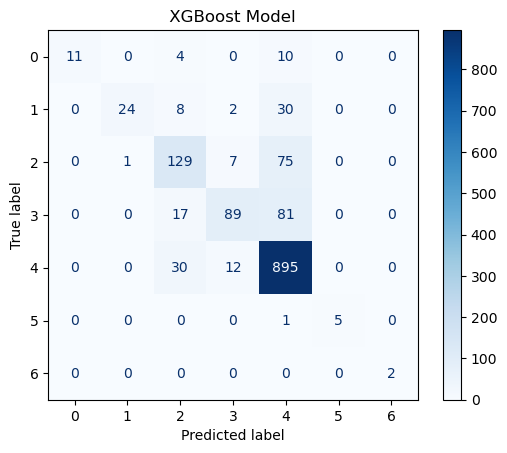

In [19]:
# Confusion matrix
from sklearn.metrics import precision_recall_fscore_support

# Calculate weighted precision, recall, and F1 scores
weighted_precision, weighted_recall, weighted_f1, _ = precision_recall_fscore_support(y_pred_full_xgb, y_encoded, average='weighted')

print("Precision on  XGBOOST :", weighted_precision)
print(" Recall ON XGBoost:", weighted_recall)
print("F1-Score on XGBOOST:", weighted_f1)


# Plot the confusion matrix for the XGBoost model on the entire dataset
plot_confusion_matrix(full_xgb_model, X, y_encoded, cmap=plt.cm.Blues)
plt.title(" XGBoost Model ")
plt.show()



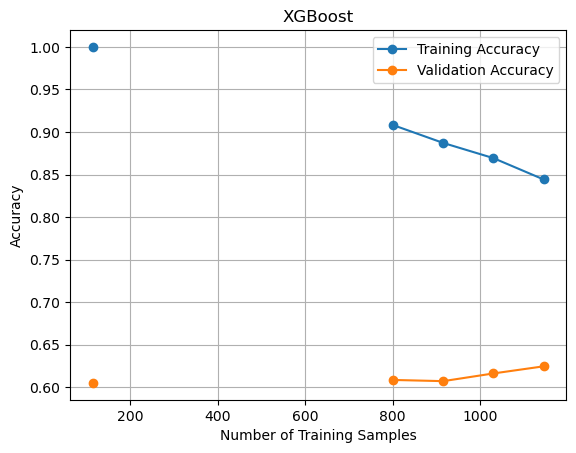

In [20]:
# Learning Curve
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy', n_jobs=-1)

    #plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), marker='o', label='Training Accuracy')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), marker='o', label='Validation Accuracy')
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Accuracy')
    plt.title('XGBoost')
    plt.legend()
    plt.grid(True)
    plt.show()

# Initialize the XGBoost model
full_xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)

# Define the training sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Plot the learning curve for the XGBoost model
plot_learning_curve(full_xgb_model, 'Learning Curve (XGBoost Model)', X, y_encoded, cv=stratified_kfold, train_sizes=train_sizes)


## Comparative Analysis for the models

## Performance Metrics

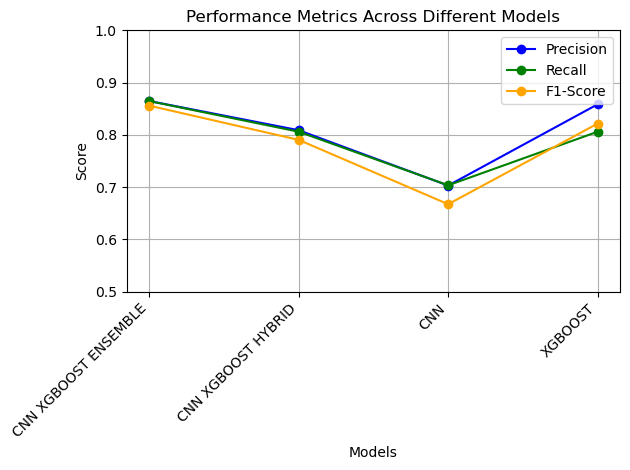

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
model_names = ["CNN XGBOOST ENSEMBLE", "CNN XGBOOST HYBRID", "CNN", "XGBOOST"]

# Metrics (precision, recall, F1-score)
precision = [0.864809030225493, 0.8089, 0.7029747711110997, 0.8584669426485199]
recall = [0.8646196789951152, 0.8060, 0.7034193998604327, 0.8060013956734124]
f1_score = [0.8559058116826682, 0.7904, 0.6672206856838888, 0.8215686444792333]

# Create line graphs for each metric
#plt.figure(figsize=(10, 6))

plt.plot(model_names, precision, marker='o', label='Precision', color='blue')
plt.plot(model_names, recall, marker='o', label='Recall', color='green')
plt.plot(model_names, f1_score, marker='o', label='F1-Score', color='orange')

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Performance Metrics Across Different Models")
plt.ylim(0.5, 1.0)
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True)
plt.show()


## Accuracy Graph

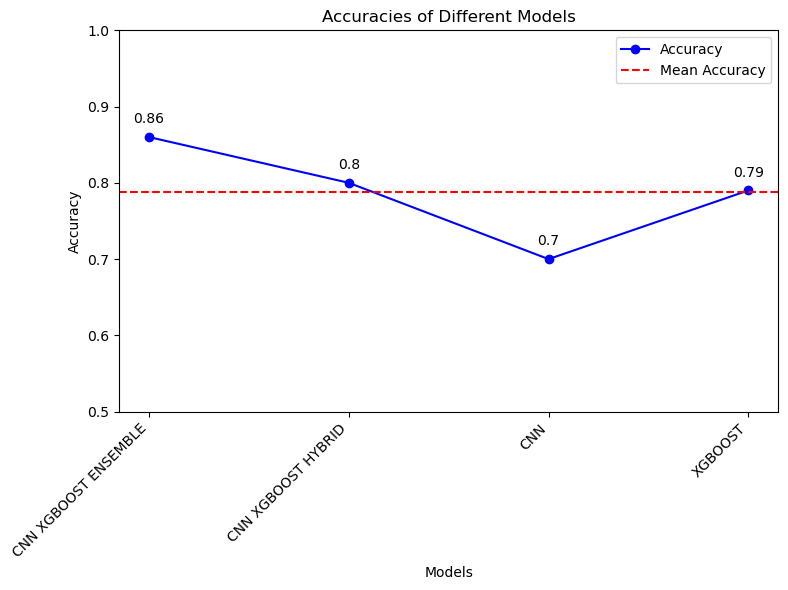

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# List of model names and accuracies
model_names = ["CNN XGBOOST ENSEMBLE", "CNN XGBOOST HYBRID", "CNN", "XGBOOST"]
accuracies = [0.86, 0.80, 0.70, 0.79]

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)

# Create a line plot
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.plot(model_names, accuracies, marker='o', color='blue', label='Accuracy')
plt.axhline(y=mean_accuracy, color='r', linestyle='dashed', label="Mean Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracies of Different Models")
plt.ylim(0.5, 1.0)  # Adjust ylim based on your accuracy range
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend()

# Adding the accuracy values as annotations on the line
for i, acc in enumerate(accuracies):
    plt.annotate(f"{round(acc, 2)}", (model_names[i], acc), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()  # Ensure proper spacing
plt.show()


## Epochs Comparison

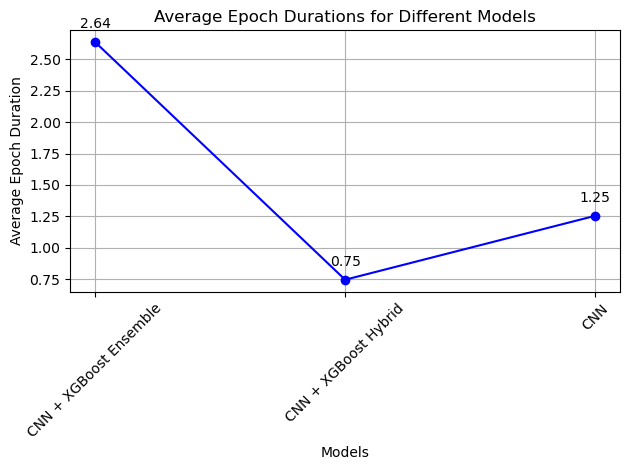

In [28]:
import matplotlib.pyplot as plt

# Model names
models = ['CNN + XGBoost Ensemble', 'CNN + XGBoost Hybrid', 'CNN']

# Average epoch duration values
avg_epoch_durations = [2.636059594154358, 0.7460162043571472, 1.2542522311210633]

#plt.figure(figsize=(8, 7))

# Creating the line graph
plt.plot(models, avg_epoch_durations, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Average Epoch Duration')
plt.title('Average Epoch Durations for Different Models')

# Display the values on top of the data points
for i, txt in enumerate(avg_epoch_durations):
    plt.annotate(f'{txt:.2f}', (models[i], avg_epoch_durations[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the graph
plt.show()
